<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
#считываем данные в dataframe
hh_df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [32]:
#ваш код здесь
print(hh_df.shape)


(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [33]:
#ваш код здесь
print(hh_df.head())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [34]:
#ваш код здесь
print(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [35]:
#ваш код здесь
print(hh_df.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [36]:
#создаем новый признак, обрезая строку словом ' образование'
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(lambda x: x.split(' образование')[0])
#Проверяем, что получили ровно 4 категории
print(hh_df['Образование'].unique())
#Получаем кол-во людей со средним образование - вопрос 3.1
print('Кол-во людей со средним образованием: ' + str(hh_df[hh_df['Образование'] == 'Среднее']['Образование'].count()))

['Неоконченное высшее' 'Высшее' 'Среднее специальное' 'Среднее']
Кол-во людей со средним образованием: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [37]:
#создаем новый признак пол - взяв первую букву из значений признака
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x[0])
#Проверяем, что получили ровно 2 значения 'м' и 'ж'
print(hh_df['Пол'].unique())
#создаем новый признак возраст - взяв первую букву из значений признака
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: int(x.split(', ')[1].strip().split(' ')[0]))
#Проверяем, что получили только числовые значения возраста
print(hh_df['Возраст'].unique())
#3.2. Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
print(round(hh_df['Пол'].value_counts(normalize=True),4))
#3.3. Чему равен средний возраст соискателей? Ответ округлите до десятых.
print('средний возраст соискателей: ' + str(round(hh_df['Возраст'].mean(),1)))
#удаляем столбец
hh_df = hh_df.drop(['Пол, возраст'], axis=1)


['М' 'Ж' 'А']
[ 39  60  36  38  26  29  46  34  35  59  27  21  31  37  30  33  42  32
  23  28  25  24  43  53  49  44  48  54  22  20  40  62  72  45  41  61
  50  58  57  52  56  18  19  51  16  47  71  63  55  64  68  17  73  66
  65  77  67  69  76  70  14  15 100]
Пол
М    0.8093
Ж    0.1907
А    0.0000
Name: proportion, dtype: float64
средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [38]:
#Напишем функцию преобразования столбца Опыт работы
def get_work_experience(col_str):
    mth = 0
    if col_str is None:
        return None
    
    if 'Опыт работы' in str(col_str):
        str_arr = col_str.split(' ')
        if 'месяц' in str_arr[3]:
            mth = int(str_arr[2])
        elif 'год'  in str_arr[3] or 'лет' in str(str_arr[3]):
            mth = int(str_arr[2]) * 12
            if 'месяц' in str_arr[5]:
               mth += int(str_arr[4])
        return mth
    else:
        return None
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_work_experience)
#3.3. Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(hh_df['Опыт работы (месяц)'].median())
#удаляем столбец
hh_df = hh_df.drop(['Опыт работы'], axis=1)


100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [39]:
#список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
#функция для обработки данных для столбца 'город'
def city_update(col_str):
    list_str = col_str.split(',')
    if 'Москва' in list_str[0]:
        return 'Москва'
    elif 'Санкт-Петербург' in list_str[0]:
        return 'Санкт-Петербург'
    else:
        for city in million_cities:
            if city in list_str[0]:
                return 'город-миллионник'
    return 'другие'

def moving_update(col_str):
    list_str = col_str.split(',')
    n = 1
    if 'переезд' in list_str[1] or 'переех' in list_str[1] :
        n = 1
    elif 'переезд' in list_str[2] or 'переех' in list_str[2]:
        n = 2
    else:
        return False
     
    if 'не готов' in list_str[n]  or 'не хочу' in list_str[n]:
        return False
    elif 'готов' in list_str[n]  or 'хочу' in list_str[n] :
        return True
    else:
        return False
    
def business_trip_update(col_str):
    list_str = col_str.split(',')
    if 'не готов' in list_str[len(list_str) - 1] :
        return False
    elif 'готов' in list_str[len(list_str) -  1] :
        return True
    elif list_str[len(list_str) - 1].strip() == '':
        return False
    else:
        return False
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(city_update)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(moving_update)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(business_trip_update)
print(hh_df['Город'].unique())
print(hh_df['Готовность к переезду'].unique())
print(hh_df['Готовность к командировкам'].unique())
#3.4. Cколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
print(hh_df['Город'].value_counts(normalize=True))
#3.5. Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
print(hh_df[(hh_df['Готовность к переезду'] == True) & (hh_df['Готовность к командировкам'] == True)]['ЗП'].count()/hh_df.shape[0])
#удаляем столбец
hh_df = hh_df.drop(['Город, переезд, командировки'], axis=1)

['другие' 'Москва' 'город-миллионник' 'Санкт-Петербург']
[False  True]
[False  True]
Город
Москва              0.371469
другие              0.353723
город-миллионник    0.164469
Санкт-Петербург     0.110339
Name: proportion, dtype: float64
0.31876899696048633


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [40]:
#ваш код здесь
#функция для создания нового столбца на основе значения базового столбца
def create_column_df(col_str):
    list_clmn = col_str.split(',')
    cnt_col   = 0
    for clmn in list_clmn:
        if clmn.strip() not in hh_df.columns:
            hh_df[clmn.strip()] = False 
            cnt_col += 1
    return cnt_col          

#функция для обновления значения в столбце  на основе значения базового столбца
def update_columns_df(col_str, **kwargs):
   list_str = col_str.split(',')
   for ls in list_str:
       if ls.strip() == kwargs['col']:
           return True
   return False     
      
#функция для создания новых столбцов df
def create_new_columns(df_clmn_name):
    new_clmn = 0
    clmn_name  = ''
    for line in hh_df[df_clmn_name]:         
        new_clmn += create_column_df(line)
    for i in range(1, new_clmn + 1):
        clmn_name = hh_df.columns[hh_df.shape[1] - i]
        hh_df[clmn_name] = hh_df[df_clmn_name].apply(update_columns_df, col = clmn_name)

create_new_columns('Занятость') 
create_new_columns('График')

#3.5 Сколько людей ищут проектную работу и волонтерство (в обоих столбцах стоит True)?
print(hh_df[(hh_df['проектная работа'] == True) & (hh_df['волонтерство'] == True)]['ЗП'].count())
#3.5 Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(hh_df[(hh_df['вахтовый метод'] == True) & (hh_df['гибкий график'] == True)]['ЗП'].count())

#удаляем столбцы
hh_df = hh_df.drop(['Занятость', 'График'], axis=1)

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [41]:
#ваш код здесь
#создаем df на основе файл csv с курсами валют
currency_dict = {'белруб' : 'BYN' ,'KZT' : 'KZT' ,'EUR' : 'EUR' ,'USD' : 'USD', 'грн': 'UAH', 'сум' : 'UZS', 'KGS' : 'KGS', 'AZN' : 'AZN'}
currency_df = pd.read_csv('ExchangeRates.csv', sep=',')
#Преобразовываем столбцы 'Обновление резюме' и date в нужный нам формат
hh_df['Обновление резюме'] =  pd.to_datetime(hh_df['Обновление резюме'],dayfirst=True).dt.date
currency_df['date'] =  pd.to_datetime(currency_df['date']).dt.date
#Выделяем из столбца ЗП сумму и валюту
hh_df['Сумма ЗП']  = hh_df['ЗП'].apply(lambda x: float(x.split(' ')[0]))
#Выделяем из столбца ЗП валюту и переводим ее в стандарт ISO
hh_df['Валюта ЗП'] = hh_df['ЗП'].apply(lambda x: currency_dict[x.split(' ')[1].replace('.', '')] if x.split(' ')[1].replace('.', '') in currency_dict else x.split(' ')[1].replace('.', ''))

#создаем связь между основным df и df с курсами валют
df_merged = pd.merge(hh_df, currency_df, left_on=['Валюта ЗП', 'Обновление резюме'], right_on=['currency', 'date'], how='left')
#Обновляем значения вспомогательных столбцов из связ-го df для руб.
df_merged.loc[df_merged['Валюта ЗП'] == 'руб', 'close'] = 1
df_merged.loc[df_merged['Валюта ЗП'] == 'руб', 'proportion'] = 1.0

#Рассчитываем зп с учетом курсов валют
hh_df['ЗП (руб)'] = df_merged['Сумма ЗП'] * df_merged['close'] / df_merged['proportion']

#3.7 Выводим значение медианы
print(hh_df['ЗП (руб)'].median())

#удаляем столбцы
hh_df = hh_df.drop(['Сумма ЗП', 'Валюта ЗП', 'ЗП'], axis=1)



C:\Users\pavlov.NS\AppData\Local\Temp\ipykernel_47988\125439934.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



59000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [58]:
# ваш код здесь
fig = make_subplots(rows=1, cols=2)
plot_data = hh_df['Возраст']
#Создаем гистограмму для полученного на предыдущем шаге набора данных. Для определения кол-ва bins, используем критерий Райса
fig.add_trace(next(
    px.histogram(
        x= 'Возраст',
        data_frame=plot_data,
        nbins = 100).select_traces()), row = 1, col = 1
)
fig.add_trace(next(
    px.box(
        x ="Возраст",
        data_frame=plot_data).select_traces()), row = 1, col = 2
)
fig.update_layout(height=500, width=2000, xaxis_title='Возраст', yaxis_title='Количество пользователей', title = 'Диаграмма распределения возраста пользователя портала hh')
fig.show()
fig.write_html("plots/1_Age.html")


<font color='light blue'>**Результаты вывода графика**
*  **Основной массив данных пользователей портала сосредоточен в возрастном промежутке от 27 до 36 лет (смотри на коробчатую диаграмму) с медианным возрастом в 31 год. Что говорт нам о том, что самые активные пользователи - это молодые люди, который только недавно закончили учебу, а также уверенные пользователи компьтером и интернетом - а это тоже в основной своей массе молодые люди.**</font>

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [59]:
# ваш код здесь
fig = make_subplots(rows=1, cols=2)
plot_data = hh_df['Опыт работы (месяц)']
#Создаем гистограмму для полученного на предыдущем шаге набора данных. Для определения кол-ва bins, используем критерий Райса
nb = 2 * round(np.cbrt(plot_data.shape[0]))
fig.add_trace(next(
    px.histogram(
        x= 'Опыт работы (месяц)',
        data_frame=plot_data,
        nbins = nb).select_traces()), row = 1, col = 1
)
fig.add_trace(next(
    px.box(
        x = 'Опыт работы (месяц)',
        data_frame=plot_data).select_traces()), row = 1, col = 2
)
fig.update_layout(height=500, width=2000, xaxis_title='Опыт работы', yaxis_title='Количество пользователей', title = 'Диаграмма распределения показателя ''опыт работы'' пользователя портала hh')
fig.show()
fig.write_html("plots/2_Experience.html")

<font color='light blue'>**Результаты вывода графика**
*  **Основной массив данных пользователей портала по опыту работа сосредоточен в промежутке от 57 до 154 мес., что прибизительно = от 5 до 13 лет (смотри на коробчатую диаграмму) с медианным опытом в 100 мес. Что говорт нам о том, что основыные пользователи- это как люди, только, закончившие вуз, так и разместившие свои рюземе сразу посел его окончания в прошлом(т.к. 5 - 13 лет сопоставимо со временем создания платформы). Людей с большим опытом работы значительно меньше, что еще раз подчеркивает то, что основной клиент портала - это уверенный пользователь интернета, а среди молодых их значительно больше. Да и люди старшего возраса заметно меньше меняют место работы.**</font>

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [60]:
# ваш код здесь
fig = make_subplots(rows=1, cols=2)
plot_data = hh_df['ЗП (руб)']
#Создаем гистограмму для полученного на предыдущем шаге набора данных. Для определения кол-ва bins, используем критерий Райса
nb = 2 * round(np.cbrt(plot_data.shape[0]))
print(plot_data.mode())
fig.add_trace(next(
    px.histogram(
        x= 'ЗП (руб)',
        data_frame=plot_data,
        nbins = nb).select_traces()), row = 1, col = 1
)
fig.add_trace(next(
    px.box(
        x = 'ЗП (руб)',
        data_frame=plot_data).select_traces()), row = 1, col = 2
)
fig.update_layout(height=500, width=2000, xaxis_title='ЗП руб.', yaxis_title='Количество пользователей', title = 'Диаграмма распределения показателя ''зарплата руб.'' пользователя портала hh')
fig.show()
fig.write_html("plots/3_Salary.html")

0    50000.0
Name: ЗП (руб), dtype: float64


<font color='light blue'>**Результаты вывода графика**
*  **Основной массив данных пользователей портала по ожидаемому размеру зп сосредоточен в промежутке от 37 до 95 тр, (смотри на коробчатую диаграмму) с медианной ожидаемой зп в 59 тр.в мес. Что, в целом, сопастовимо со ср.зп по РФ того времени, на которое формируется диаграмма. На графике присутствуют явный выброс, где ожидаемая зп более 24 млн. в месяц -что сильно ужимает график реальной картины наблюдений. Выбросы за 1млн. могут быть и реальными ожидаемыми зп для
людей, кто претендует на позиции топ-менеджеров крупных компаний, но скорее всего это информация, котрая имеет ошибочную базу и может быть отброшена в рамках построения общей модели.**</font>

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [62]:
#Выберем только тех пользователей, кто ожидает зп меньше 1млн
salary_data = hh_df[hh_df['ЗП (руб)'] < 1000000 ].groupby('Образование')['ЗП (руб)'].median()

#Используем для отображения тип графика 'столбчатая диаграмма', тк нас интересует сравнение показателей по категориям
#Формируем диаграмму
fig = px.bar(
    salary_data,
    width  = 900,
    height = 400,
    title  ='Диаграмма, показывающая зависимость между образованием и медианной зп') 
fig.update_layout(
    xaxis_title="Образование",
    yaxis_title="Медианная зарплата"
)
#Выводим результат на экран
fig.show()
fig.write_html("plots/4_Salary_Education.html")


<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы, можно сделать вывод, что ожидаемая зп напрямую зависит от уровня образования и, соответственно, важно использовать данное соотношение для построения модели прогнозирования зп**</font>

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [63]:
#Выберем только тех пользователей, кто ожидает зп меньше 1млн
salary_city_data = hh_df[hh_df['ЗП (руб)'] < 1000000]

#Используем для отображения тип графика 'столбчатая диаграмма', тк нас интересует сравнение показателей по категориям
#Формируем диаграмму
fig = px.box(
    salary_city_data,
    y = 'ЗП (руб)',
    x = 'Город',
    width  = 2000,
    height = 500,
    title  ='Диаграмма, показывающая зависимость между городом и разбросом ожидаемой зп')
fig.update_layout(
    xaxis_title="Город",
    yaxis_title="Ожидаемая зарплата"
)
#Выводим результат на экран
fig.show()
fig.write_html("plots/5_Salary_Cities.html")


<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы, можно сделать вывод, что ожидаемая зп зависит от города. Москва, естественно лидирует и по ожиданиям зп и по разбросу. Это связано и с кол-вом людей и с уровнем жизни в столице.**</font>

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [64]:
#Выберем только тех пользователей, кто ожидает зп меньше 1млн
salary_mov_data = hh_df[hh_df['ЗП (руб)'] < 1000000 ][['Готовность к переезду', 'Готовность к командировкам', 'ЗП (руб)']]

#Выполним групповую операцию
salary_mov_data = salary_mov_data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

#Формируем график
fig  =  px.bar(
       data_frame = salary_mov_data,
       labels={
             "value": "Медианная ЗП"
            },
       title = 'Соотношение медианной зп и признаками Готовность к переезду и Готовность к командировкам'
)


fig.show()
fig.write_html("plots/6_Salary_Categories.html")

<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы, можно сделать вывод, что ожидаемая зп у пользователей, готовых и к командировкам и к переезду логично выше чем у тех, кто таких готовностей не имеет**</font>

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [65]:
#Строим сводную таблицу
pivot_table_salary = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

#Формируем график
fig  =  px.imshow(pivot_table_salary)
fig.show()
fig.write_html("plots/7_Educatione_Age.html")

<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы, можно сделать вывод, что чем выше уровень образования, тем выше ожидаемый уровень зп. Кроме того можно сделать вывод, что с возрастом желаемый уровень зп также растет**</font>

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [66]:
#Выбираем только признаки опыт работы и возраст
scatter_data_age = hh_df[['Опыт работы (месяц)', 'Возраст']]
#Получаем новый признак опыт в годах
scatter_data_age['Опыт работы(год)'] = round(scatter_data_age['Опыт работы (месяц)'] / 12, 2)
#Формируем график
fig = px.scatter(
    scatter_data_age, 
    y = "Опыт работы(год)",
    x = "Возраст",
    height = 600,
    width  = 900
)
#Добавляем линию на грфик
fig.add_traces(list(px.line(x= [0, 100], y = [0, 100]).select_traces()))
#Выводим график на экран
fig.show()
fig.write_html("plots/8_Experience_Age.html")



C:\Users\pavlov.NS\AppData\Local\Temp\ipykernel_47988\1101979828.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы, можно сделать естественный вывод, что с увеличением возраста растет и опыт работы. Также можно видеть и не большое количество аномалий, где опыт больше возраста**</font>

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [67]:
#Проведем анализ по признаку 'удаленная работа' и построим 2 графика
#Построим гистограмму для отображения взаимосвязи признаков удаленная работа и возраст
df_remote = hh_df[(hh_df['удаленная работа'] == True)]['Возраст']

#Формируем график
fig = px.histogram(
        x= 'Возраст',
        data_frame = df_remote,
        nbins = 100)
fig.update_layout(
    yaxis_title="Количество пользователей(удаленная работа)",
    title = 'Диаграмма распеделения возраста среди пользователей, которые ищут удаленный формат работы'
)
fig.show()
fig.write_html("plots/9_Remote.html")

#Построим диаграмму для отображения взаимосвязи признаков город и зп
df_remote_salary = hh_df[(hh_df['удаленная работа'] == True)].groupby('Город')['ЗП (руб)'].median()

#Формируем график
fig = px.bar(
    df_remote_salary,
    width  = 2000,
    height = 500,
    title  ='Диаграмма, показывающая зависимость между городом и ожидаемой медианной зп в сфере удаленной работы')
fig.update_layout(
    xaxis_title="Город",
    yaxis_title="Ожидаемая зарплата"
)
fig.show()
fig.write_html("plots/10_Remote_Salary.html")



<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы, можно сделать вывод, что в удаленной работе заинтересованы пользователи молодого возраста до 35 лет, кто еще, возможно, не обзавелся семьями и есть желание путешествовать и 
быть мобильным - далее с возрастом эта необходимость падает - как мы видим из представленного графика. Естественно, что в Москве уровень финансового запроса в данной категории значительно выше.**</font>

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [51]:
#Формируем спиок из названия колонок df
duplicated_columns = list(hh_df.columns)
#Создаем маску для поиска дубликатов
mask = hh_df.duplicated(subset=duplicated_columns)
#применяем маску
hh_duplicates = hh_df[mask]
#выводим на экран кол-во дублей
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')
#удаляем дубли
hh_df = hh_df.drop_duplicates(subset=duplicated_columns)




Число найденных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [52]:
#получим список столбцов и кол-во пропусков
cols_with_null = hh_df.isnull().sum()
#выберем только те, где есть пропуски
cols_with_null = cols_with_null[cols_with_null>0].sort_values(ascending=False)
#выведем их на экран
print(cols_with_null)


Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [53]:
#Удалим строки в определенных столбцах, где есть пропуск
hh_df = hh_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
#Заменим пропущенные значения медианным значением столбца
hh_df['Опыт работы (месяц)'].fillna(hh_df['Опыт работы (месяц)'].median())
#Выведем среднее значение столбца
print(round(hh_df['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [54]:
#создаем df по выбросам из  условия задачи
emiss_salary_df = hh_df[(hh_df['ЗП (руб)'] > 1000000) | (hh_df['ЗП (руб)'] < 1000)]
#удаляем эти данные из основного df по индексам из df выбросов
hh_df = hh_df.drop(emiss_salary_df.index, axis=0)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [55]:
#создаем df по выбросам из  условия задачи
emiss_age_exp_df = hh_df[(hh_df['Опыт работы (месяц)'] / 12 >= hh_df['Возраст'])]
#print(emiss_age_exp_df.shape[0])
#удаляем эти данные из основного df по индексам из df выбросов
hh_df = hh_df.drop(emiss_age_exp_df.index, axis=0)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

0.4708094957161126
Число выбросов по методу z: 3
Результирующее число z: 44482
31137     15
32950     15
33654    100
Name: Возраст, dtype: int64


C:\Users\pavlov.NS\AppData\Local\Temp\ipykernel_47988\2883259026.py:23: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



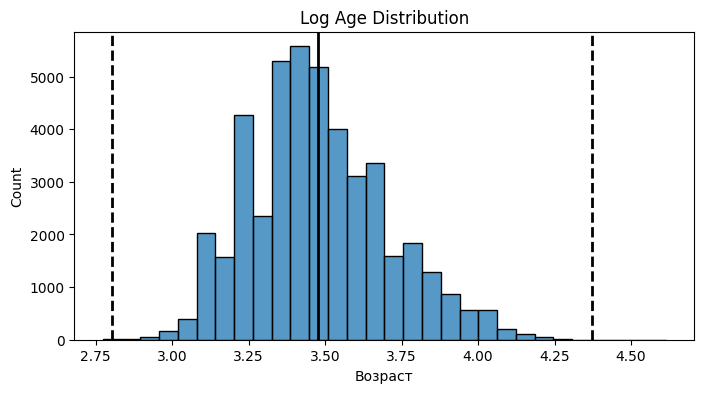

In [56]:
#Функция поиска выброса с помощью метода z-отклонений
def outliers_z_score(data, feature, left_n = 3, right_n = 3, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left_n * sigma
    upper_bound = mu + right_n * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#Строим графика распределения возраста в логорифмическом масштабе
log_age = np.log(hh_df['Возраст'] + 1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution'),
fig.show()

#получим Численный показатель асимметрии
print(log_age.skew())

#Ищем выбросы с помощью метода z-отклонений
outliers, cleaned = outliers_z_score(hh_df, 'Возраст', left_n= 3, right_n = 4, log_scale = True)
print(f'Число выбросов по методу z: {outliers.shape[0]}')
print(f'Результирующее число z: {cleaned.shape[0]}')

#удаляем эти данные из основного df по индексам из df выбросов
hh_df = hh_df.drop(outliers.index, axis=0)

#выводим на экран таблицу с выбросами
print(outliers['Возраст'])


<font color='light blue'>**Результаты вывода графика**
*  **Из результата вывода данной диаграммы(кол-во столбцов с правой стороны от моды больше чем с левой) и из численного показателя ассиметрии, который больше 0, делаем вывод, что распределение ассиметрично в правую сторону. Из таблицы выбросов мы видим, что метод z отклонений посчитал выбросом - либо слишком молодых 15 лет, либо слишком пожилых - 100 лет. В итоговой таблице выбросов оказалось 3 записи.**</font>